In [1]:
##importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('C:/Users/jasmeet/Desktop/big mart/Train.csv')
test = pd.read_csv('C:/Users/jasmeet/Desktop/big mart/Test.csv')
train.describe()
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [3]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [6]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
Big_Mart = pd.concat([train, test], sort = False)
print(train.shape, test.shape, Big_Mart.shape)

(8523, 13) (5681, 13) (14204, 13)


In [7]:
Big_Mart['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

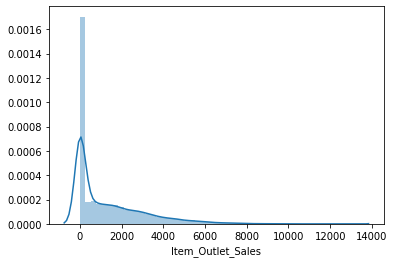

In [8]:
sns.distplot(Big_Mart['Item_Outlet_Sales'])

In [9]:
categorial_features = Big_Mart.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


In [10]:
numerical_features = Big_Mart.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [11]:
Big_Mart['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

##DATA CLEANING

In [13]:
Big_Mart.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

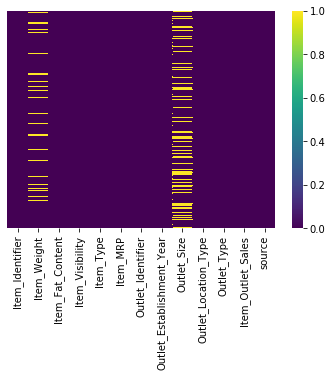

In [14]:
sns.heatmap(Big_Mart.isnull(),yticklabels=False,cmap="viridis")

In [15]:
for col in categorial_features:
    print('\n%s column: '%col)
    print(Big_Mart[col].value_counts())


Item_Identifier column: 
NCF30    10
FDE21    10
NCE43    10
FDN01    10
NCG43    10
FDH56    10
DRA24    10
FDQ04    10
FDR23    10
FDT09    10
FDQ12    10
FDP27    10
FDY24    10
FDP10    10
FDV60    10
FDW16    10
FDW56    10
FDL12    10
FDQ14    10
NCE07    10
FDU48    10
FDB41    10
DRC36    10
FDZ26    10
DRG49    10
FDU26    10
FDX47    10
NCZ54    10
FDZ23    10
FDB60    10
         ..
FDS34     8
FDL28     8
FDA21     8
FDW08     8
DRG15     8
FDN44     8
FDI02     8
FDV11     8
FDS36     8
DRG36     8
FDM01     8
FDO44     8
FDA04     8
FDA35     8
FDH09     8
FDD35     8
FDY50     8
FDI46     7
FDR51     7
FDM10     7
FDL50     7
NCW54     7
FDS22     7
FDM52     7
NCL42     7
DRN11     7
FDM50     7
FDX49     7
FDH58     7
FDO33     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column: 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type column: 
Fruits and Vegetables    201